# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `plt.legend` command, which automatically creates a legend for any labeled plot elements (see the following figure):

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")


In [3]:
%matplotlib inline
import numpy as np

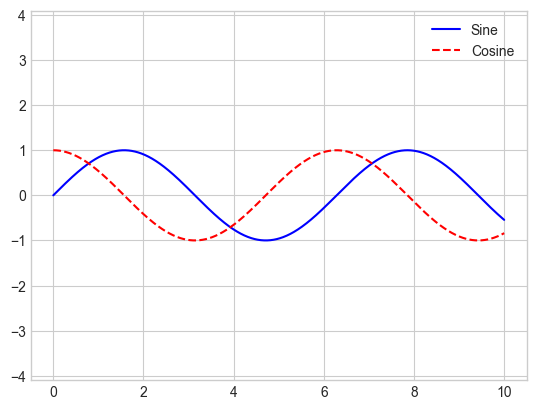

In [4]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn on the frame (see the following figure):

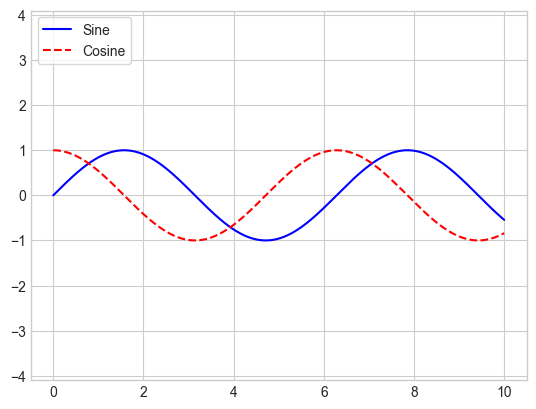

In [5]:
ax.legend(loc='upper left', frameon=True)
fig

We can use the ``ncol`` command to specify the number of columns in the legend, as shown in the following figure:

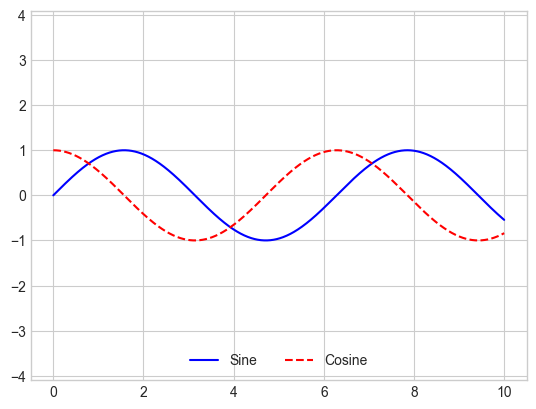

In [6]:
ax.legend(loc='lower center', ncol=2)
fig

And we can use a rounded box (`fancybox`) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text (see the following figure):

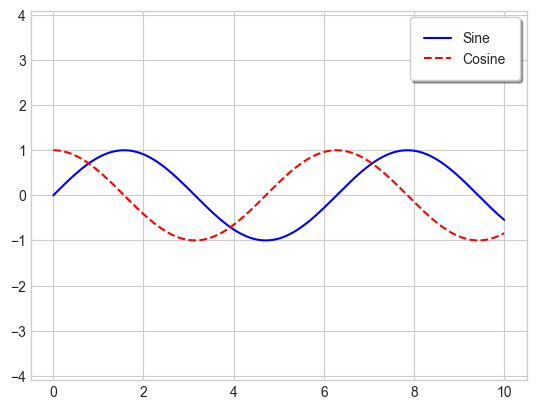

In [7]:
ax.legend(frameon=True, fancybox=True, framealpha=1,
          shadow=True, borderpad=1)
fig

For more information on available legend options, see the `plt.legend` docstring.

## Choosing Elements for the Legend

As we have already seen, by default the legend includes all labeled elements from the plot.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by `plot` commands.
`plt.plot` is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to `plt.legend` will tell it which to identify, along with the labels we'd like to specify (see the following figure):

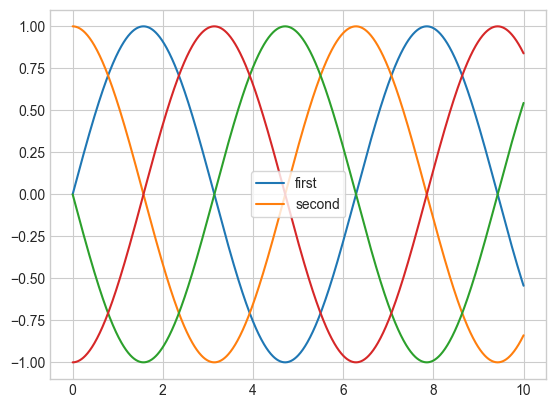

In [8]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend (see the following figure):

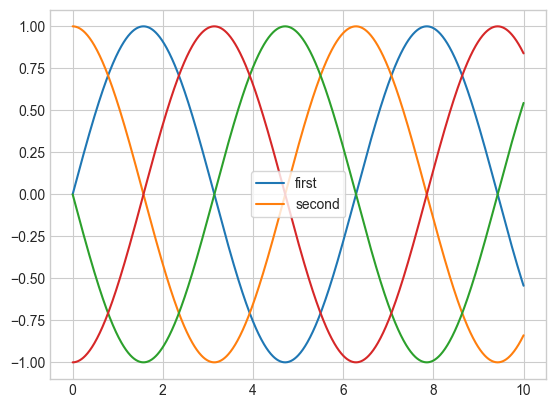

In [9]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True);

Notice that the legend ignores all elements without a `label` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries (see the following figure):

In [10]:
# Uncomment to download the data
# url = ('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
#        'master/notebooks/data/california_cities.csv')
# !cd data && curl -O {url}

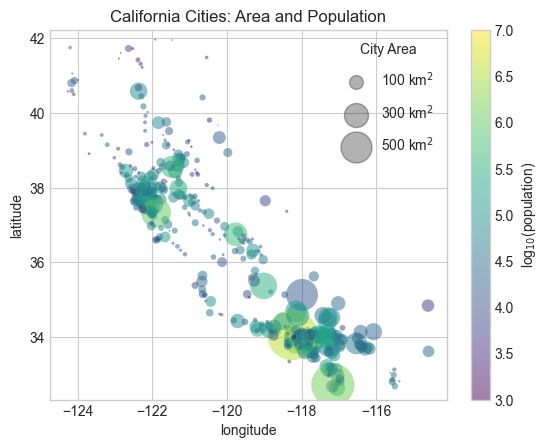

In [12]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Recall that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects that are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard `legend` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using `plt.legend` or `ax.legend`, it will simply override the first one.
We can work around this by creating a new legend artist from scratch (`Artist` is the base class Matplotlib uses for visual attributes), and then using the lower-level `ax.add_artist` method to manually add the second artist to the plot (see the following figure):

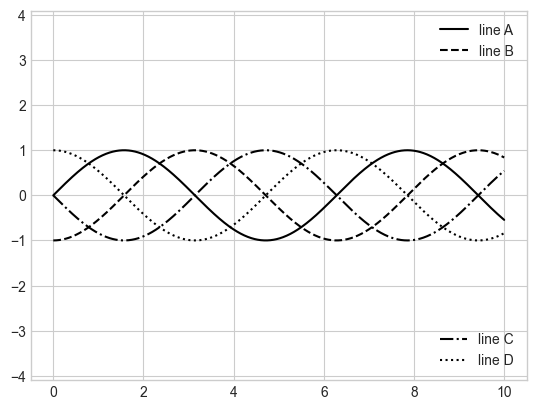

In [13]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of `ax.legend` (recall that you can do this with within the Jupyter notebook using `ax.legend??`) you'll see that the function simply consists of some logic to create a suitable `Legend` artist, which is then saved in the `legend_` attribute and added to the figure when the plot is drawn.